<a href="https://colab.research.google.com/github/tajain07/neural-network-playground/blob/master/MLP_for_MNIST_using_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np

In [0]:
from torchvision import datasets
import torchvision.transforms as transforms

In [0]:
num_workers = 0
batch_size = 20

transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True,
                           download=True,transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                           download=True,transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

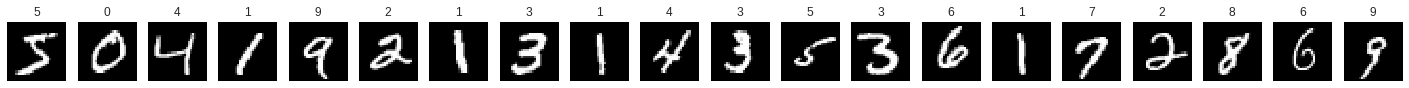

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
  ax = fig.add_subplot(1, 20, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
  ax.set_title(str(labels[idx].item()))

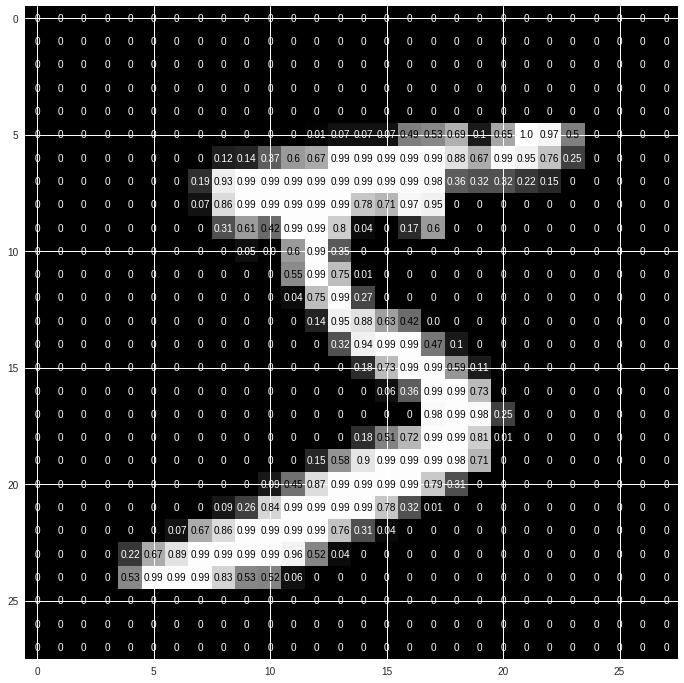

In [36]:
img = np.squeeze(images[0])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
  for y in range(height):
    val = round(img[x][y],2) if img[x][y] != 0 else 0
    ax.annotate(str(val), xy=(y,x),
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[x][y]<thresh else 'black')

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [39]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    hidden_1 = 512
    hidden_2 = 512
    
    self.fc1 = nn.Linear(28*28, hidden_1)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    self.fc3 = nn.Linear(hidden_2, 10)
    self.dropout = nn.Dropout(0.2)
    
  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.fc3(x)
    return x
  
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [42]:
n_epochs = 30
model.train()

for epoch in range(n_epochs):
  train_loss = 0.0
  
  for data, target in train_loader:
    # clear the gradients of all optimized variables
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    #backward pass : compute gradient of the loss with respect to model parameters
    loss.backward()
    optimizer.step()
    # update running training loss
    train_loss += loss.item()*data.size(0)
  
  train_loss = train_loss/len(train_loader.dataset)
  
  print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.134397
Epoch: 2 	Training Loss: 0.119755
Epoch: 3 	Training Loss: 0.108561
Epoch: 4 	Training Loss: 0.098366
Epoch: 5 	Training Loss: 0.088448
Epoch: 6 	Training Loss: 0.082894
Epoch: 7 	Training Loss: 0.076773
Epoch: 8 	Training Loss: 0.070521
Epoch: 9 	Training Loss: 0.065605
Epoch: 10 	Training Loss: 0.061144
Epoch: 11 	Training Loss: 0.056675
Epoch: 12 	Training Loss: 0.053570
Epoch: 13 	Training Loss: 0.049626
Epoch: 14 	Training Loss: 0.047118
Epoch: 15 	Training Loss: 0.044274
Epoch: 16 	Training Loss: 0.042482
Epoch: 17 	Training Loss: 0.039078
Epoch: 18 	Training Loss: 0.037741
Epoch: 19 	Training Loss: 0.035957
Epoch: 20 	Training Loss: 0.034138
Epoch: 21 	Training Loss: 0.033209
Epoch: 22 	Training Loss: 0.030701
Epoch: 23 	Training Loss: 0.028211
Epoch: 24 	Training Loss: 0.028361
Epoch: 25 	Training Loss: 0.026265
Epoch: 26 	Training Loss: 0.025206
Epoch: 27 	Training Loss: 0.024101
Epoch: 28 	Training Loss: 0.022590
Epoch: 29 	Training Loss: 0.0

In [45]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data, target in test_loader:
  output = model(data)
  loss = criterion(output, target)
  
  test_loss += loss.item()* data.size(0)
  # convert output probabilities to predicted class
  _, pred = torch.max(output, 1)
  # compare predictions to true label
  correct = np.squeeze(pred.eq(target.data.view_as(pred)))
  # calculate test accuracy for each object class
  for i in range(batch_size):
    label = target.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] += 1
  
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))


for i in range(10):
  if class_total[i] > 0:
    print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (str(i), 100 * class_correct[i] / class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
  else:
    print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
    
    
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.057320

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 99% (1126/1135)
Test Accuracy of     2: 98% (1012/1032)
Test Accuracy of     3: 98% (991/1010)
Test Accuracy of     4: 98% (970/982)
Test Accuracy of     5: 98% (879/892)
Test Accuracy of     6: 98% (940/958)
Test Accuracy of     7: 98% (1009/1028)
Test Accuracy of     8: 96% (944/974)
Test Accuracy of     9: 97% (985/1009)

Test Accuracy (Overall): 98% (9827/10000)


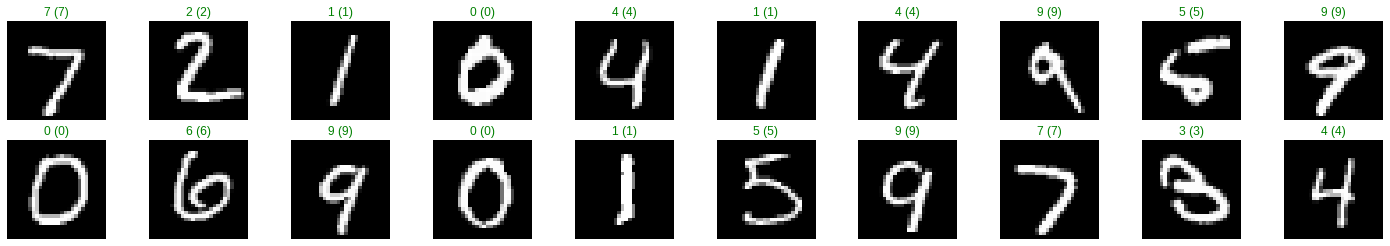

In [47]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))